# Topic modeling and Latent Dirichlet Allocation

In natural language processing, latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar.  
This model could solve the problem that when some data belong to multiple clusters. For examples:  

1. In recommendation systems, each user is part of multiple "cluster" or topics in this scenario. And each topics consists of different items(like movies, products)  
2. In text analysis, each document is part of multiple topics(like religious, sports). And each topics consists of co-occurring words. 
3. In healthcare systems, each patient's health record is part of multiple topics(like heart condition, pancreatitis). And each topics consists of co-occurring events.   

## 1. Import Data

In this tutorial, 20 Newsgroups data set will be implemented. The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.  
Though labels(topics for a document) is given, in this tutorial labels will not be included since topic modeling is about clustering.  
This dataset is included in sklearn. Sampling size will be 10,000, and headers, footers and quotes will be removed. Random state is 15688, this could make sure sampling will be constant. 

In [1]:
%%time
from sklearn.datasets import fetch_20newsgroups

sampling_size = 10000
raw_data = fetch_20newsgroups(shuffle=True, random_state=15688, 
                              remove=('headers', 'footers', 'quotes')).data[:sampling_size]

Wall time: 4.84 s


Take a look at data:

In [2]:
print(raw_data[0])




IMHO = in my humble opinion!!







I didn't say there was no value - all I said was that it is very confusing
to newbies. 


Bill, you are kidding yourself here. Firstly, motorcycles do not steer
themselves - only the rider can do that. Secondly, it is the adhesion of the
tyre on the road, the suspension geometry  and the ground clearance of the
 motorcycle which dictate how quickly you can swerve to avoid obstacles, and
not the knowledge of physics between the rider's ears. Are you seriously
suggesting that countersteering knowledge enables you to corner faster
or more competentlY than you could manage otherwise??



Formal training in this country (as far as I am aware) does not include
countersteering theory.  I found out about countersteering about six years ago,
from a physics lecturer who was also a motorcyclist. I didn't believe him
at first when he said I steered my bike to the right to make it turn left,
but I went out and analysed closely what I was doing, and realized h

## 2. Word Embedding

Each document need to be transferred to matrix which columns represent features(in this case, different words) and each rows represent documents.  
In this tutorial, max_features is set to be 1000, which means each document will be represented by 1000 words' frequency. Also, stop_words will be extracted since for most of doucments stop words are contained. Besides stop words, any word whose frequency is above 95% is also ignored. Such words will increase correlation between documents which will cause noise in clustering. 

In [3]:
n_features = 1000
from sklearn.feature_extraction.text import CountVectorizer

model_vectorizer = CountVectorizer(max_features=n_features, max_df=0.95, stop_words='english')

The summary of model_vectorizer

In [4]:
model_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=1000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
%%time
# Transfer raw text data into document-words matrix
documents_words = model_vectorizer.fit_transform(raw_data)

# Take a look at features(words in this case). First 40 features are numbers, that's why I slice features until 80. 
print(model_vectorizer.get_feature_names()[30:80])

# The shape of document_words matrix should be #documents by #features
print(documents_words.shape)

['25', '26', '27', '28', '29', '2di', '2tm', '30', '300', '31', '32', '33', '34', '34u', '35', '36', '37', '38', '39', '3t', '40', '41', '42', '43', '44', '45', '48', '50', '500', '55', '60', '64', '6ei', '70', '75', '75u', '7ey', '80', '800', '86', '90', '91', '92', '93', 'a86', 'able', 'ac', 'accept', 'access', 'according']
(10000, 1000)
Wall time: 1.53 s


## 3. Apply LDA Model

LDA model will cluster documents according to words frequency and generate words_topics matrix: each column represent a feature, in this case it is a word. Each row represent a cluster, in this case it is a topic.   
After fitting LDA model, components attributes is words_topics matrix.  
And the object fit() return is documents_topics matrix: each row represent a document or data point, and each column represent a cluster, or topic in this case.

In [25]:
%%time
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 10 
lda = LatentDirichletAllocation(n_topics=num_topics, learning_method='online', max_iter = 100)
documents_topics = lda.fit_transform(documents_words)
words_topics = lda.components_

Wall time: 2min 47s


In [26]:
# shape of documents_topics should be #data by #clusters
print(documents_topics.shape)
# shape of words_topics should be #clusters by #features
print(words_topics.shape)

(10000, 10)
(10, 1000)


## 4. Visualization of Result

### 4.1 words_topics matrix

In [27]:
# List the top 10 words in each topic
import numpy as np
topic_word_distributions = np.array([topic_word_pseudocounts / np.sum(topic_word_pseudocounts)
                                     for topic_word_pseudocounts in words_topics])

num_top_words = 10

print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
print()

for topic_idx in range(num_topics):
    print('[Topic %d]' % (topic_idx + 1))
    sort_indices = np.argsort(topic_word_distributions[topic_idx])[::-1]
    for rank in range(num_top_words):
        word_idx = sort_indices[rank]
        print('     %s: %f' % (model_vectorizer.get_feature_names()[word_idx], topic_word_distributions[topic_idx, word_idx]))
    print()

Displaying the top 10 words per topic and their probabilities within the topic...

[Topic 1]
     space: 0.040427
     new: 0.020704
     years: 0.018220
     power: 0.013128
     air: 0.013112
     1993: 0.012917
     service: 0.012839
     ground: 0.011952
     water: 0.011697
     medical: 0.011604

[Topic 2]
     windows: 0.026108
     thanks: 0.022502
     card: 0.017719
     dos: 0.015918
     does: 0.014076
     scsi: 0.013888
     disk: 0.013182
     pc: 0.013166
     mail: 0.011958
     memory: 0.011816

[Topic 3]
     people: 0.033267
     government: 0.031340
     law: 0.022848
     state: 0.014774
     israel: 0.014523
     public: 0.013374
     encryption: 0.013354
     war: 0.012488
     rights: 0.012321
     right: 0.011683

[Topic 4]
     ax: 0.807413
     max: 0.059402
     g9v: 0.011944
     pl: 0.008438
     b8f: 0.008306
     a86: 0.006479
     cx: 0.005563
     1d9: 0.005360
     1t: 0.005308
     bhj: 0.005149

[Topic 5]
     said: 0.019706
     people: 0.018720
 

The number of topics is apparently a hyperparameter which need to be chosen wisely. In this case, since topic number is not optimal, there are some topics don't make sense: Topic 4 and Topic 6.  
But there are also some topics could be interpolated, for example:  
1. In Topic 3, it is apparently about politics or related to middle-east. 
2. In Topic 10, it is about religious. 
3. In Topic 2, it is about computer or technology related topic. 
4. In Topic 9, it could be cluster of e-mails. 

### 4.2 Apply t-SNE on documents_topics

By using t-SNE on dimension reduction, the documents_topics matrix could be visualized.

In [28]:
%%time
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

np.random.seed(15688)
random_sample = np.random.permutation(len(documents_topics))[:10000]
tsne = TSNE(n_components=2, verbose=1, init = 'pca', angle = 0.99, perplexity=40)
tsne2d = tsne.fit_transform(documents_topics[random_sample])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.181258
[t-SNE] Error after 425 iterations: 1.181258
Wall time: 4min 47s


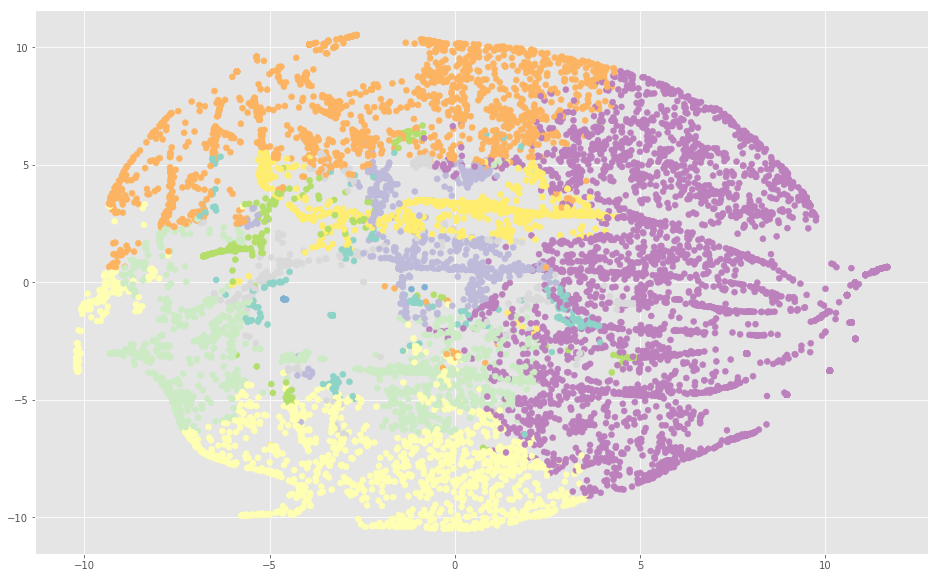

In [37]:
docTopic = []
plt.figure(figsize=(16,10))
for doc in documents_topics[random_sample]:
    docTopic.append(np.argmax(doc))    
plt.scatter(tsne2d[:, 0], tsne2d[:, 1], c=docTopic, cmap='Set3')
plt.show()